In [225]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [226]:
import pandas as pd
from IPython.display import display

from graphing import *
import numpy as np
from matplotlib import pyplot as plt

import re

%autoreload

In [227]:
day7 = pd.read_csv('logs/day7.csv', low_memory=False)
day7 = day7.replace({'Siebel_1450_All': 'Siebel_900_All'})

In [228]:
day7_test = Test(day7, 240, segmented=False,ignore_error_pct=True)
day7_test.unique_labels

array(['Token_TnT', 'Token Request', 'TnT_BAU', 'WG_BAU', 'Siebel_BAU',
       'RTSA_BAU', 'RTSA-EDD_BAU', 'QSL_BAU', 'TnT_Base', 'WG_Base',
       'RTSA_Base', 'RTSA-EDD_Base', 'Siebel_Base', 'QSL_Base',
       'RTSA-EDD_20th', 'RTSA_20th', 'RTSA-EDD_40th', 'RTSA_40th',
       'WG_100', 'WG_200', 'Siebel_600', 'Siebel_900', 'TnT_4Th',
       'TnT_7Th', 'TnT_7Th_All', 'WG_200_All', 'RTSA_40th_All',
       'RTSA-EDD_40th_All', 'Siebel_900_All'], dtype=object)

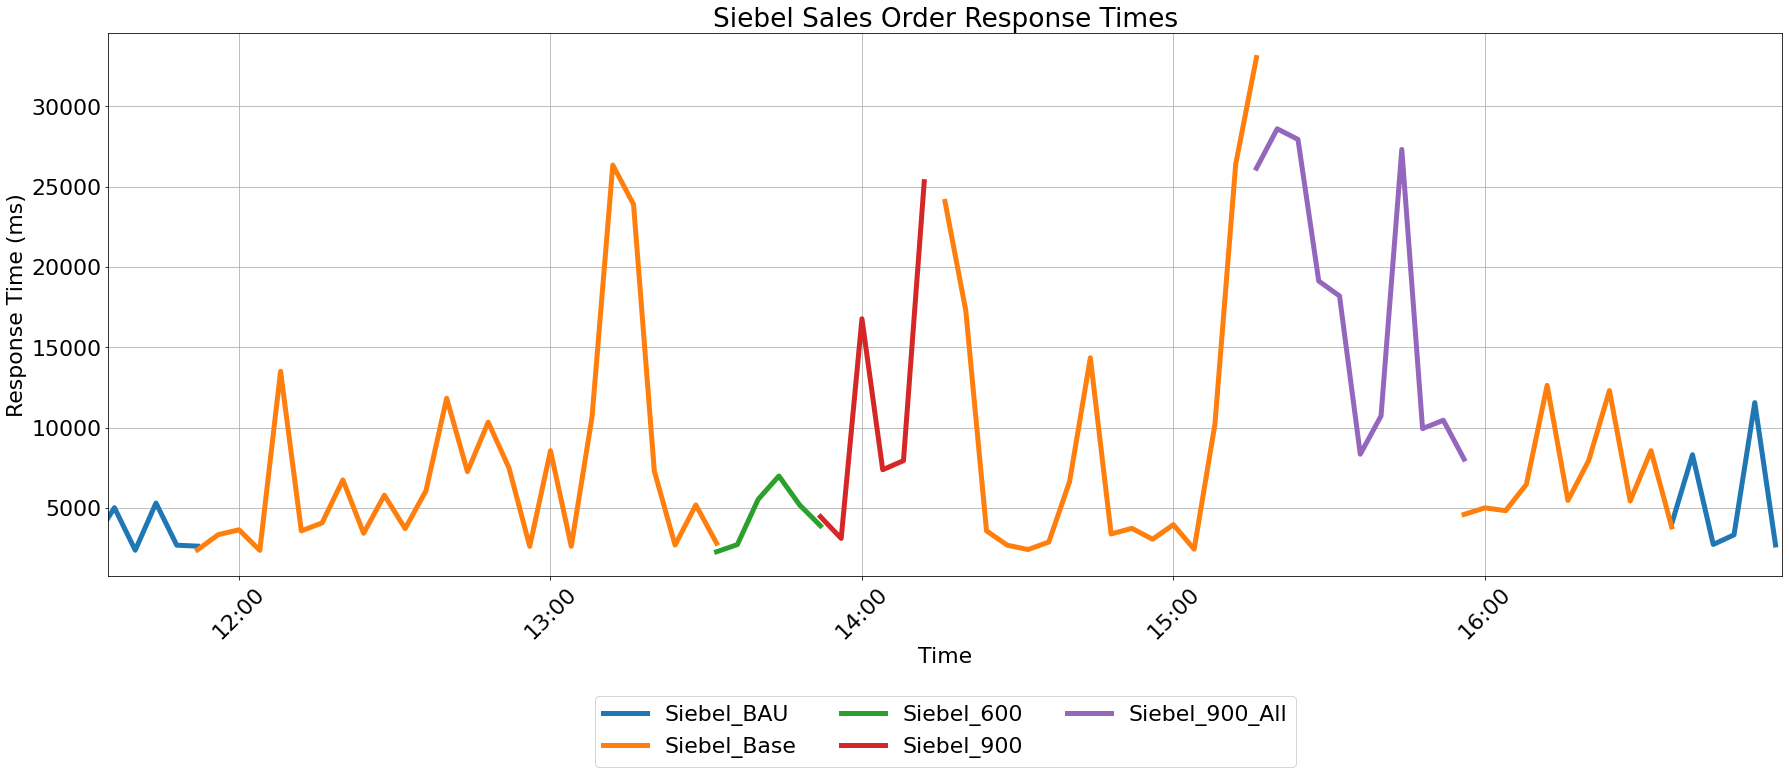

In [229]:
day7_test.time_series_by_categories(['Siebel'], [], 'Siebel Sales Order Response Times')

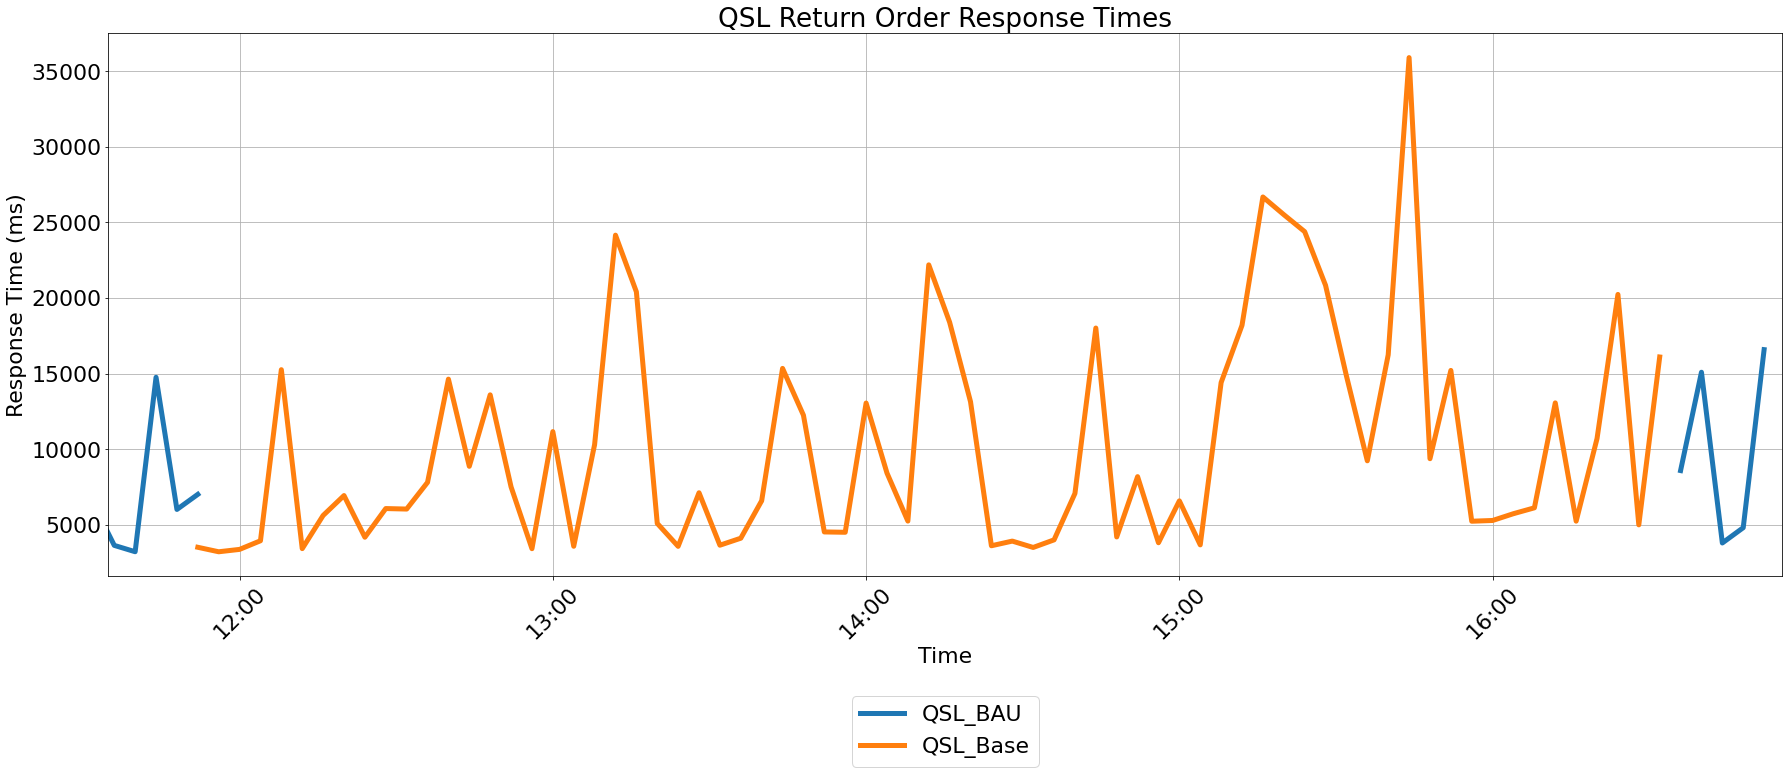

In [230]:
day7_test.time_series_by_categories(['QSL'], [], 'QSL Return Order Response Times')

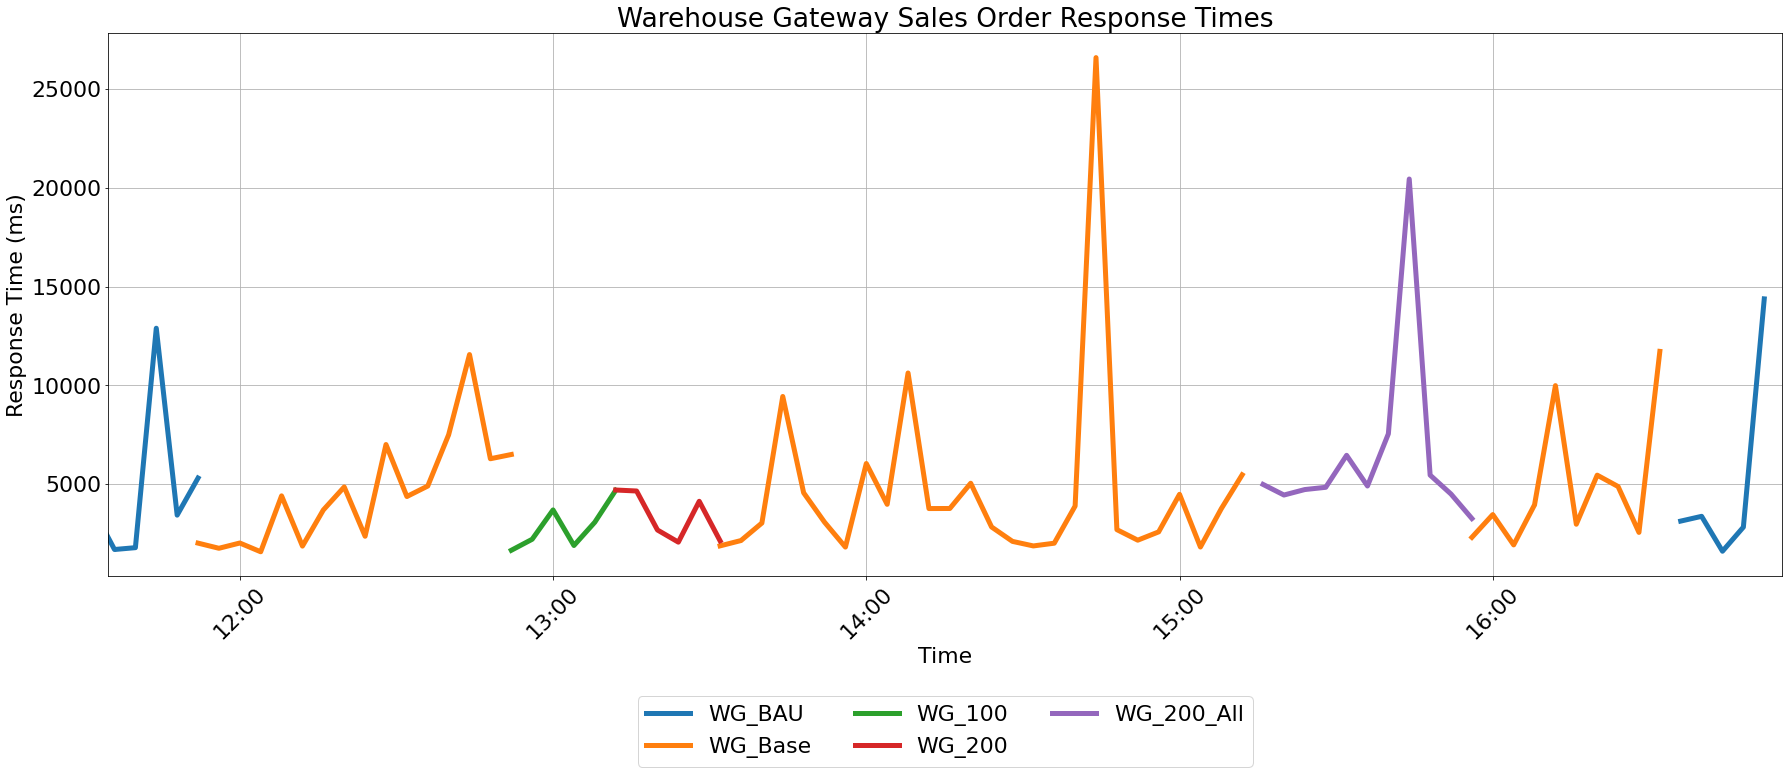

In [231]:
day7_test.time_series_by_categories(['WG'], [], 'Warehouse Gateway Sales Order Response Times')

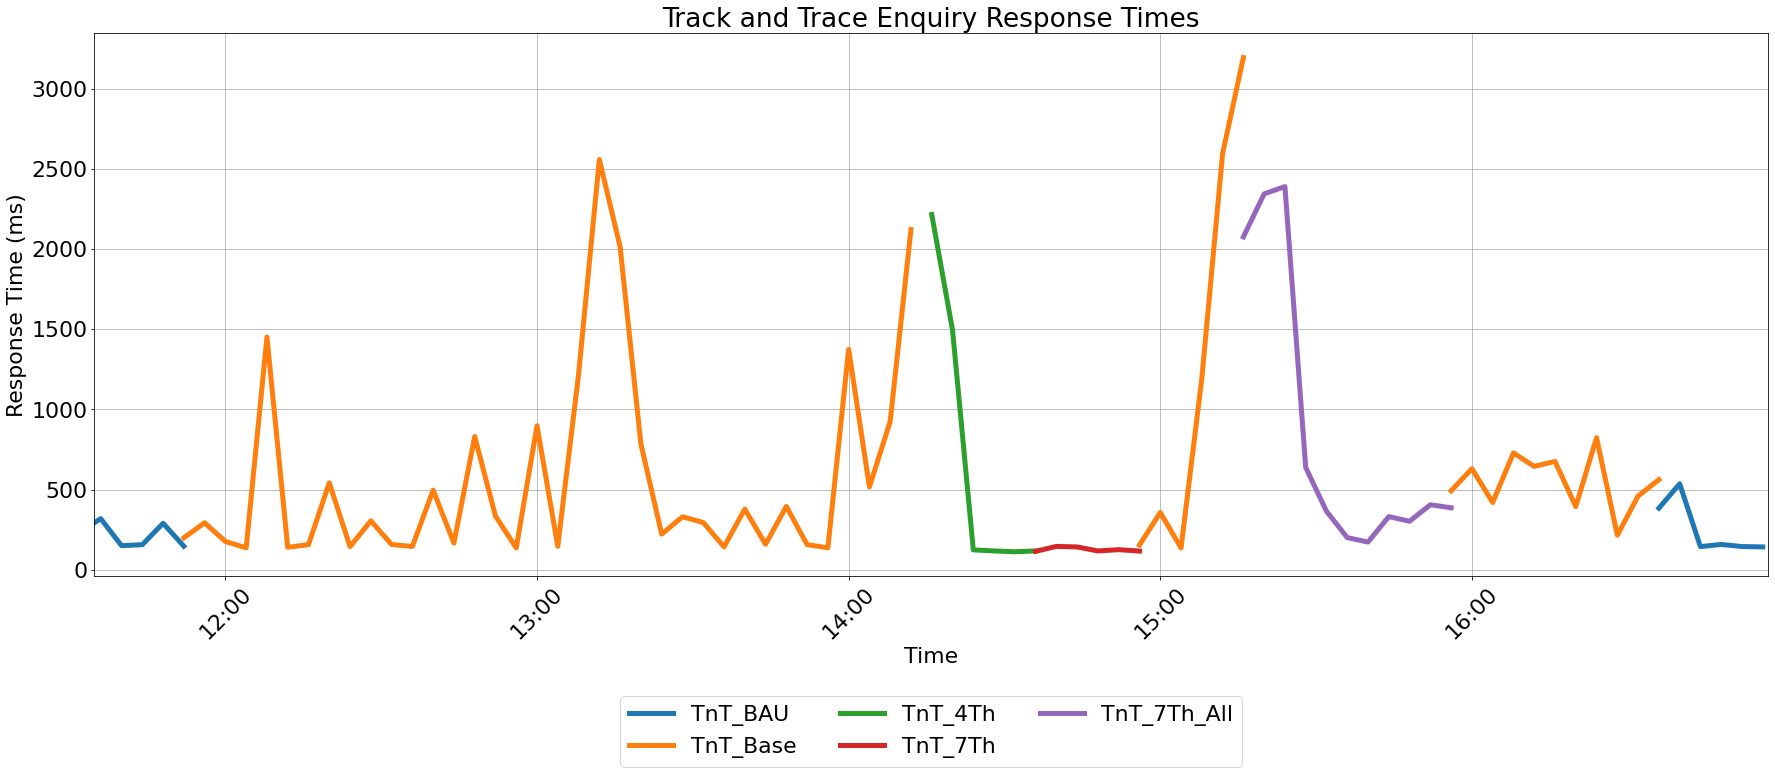

In [232]:
day7_test.time_series_by_categories(['TnT'], [], 'Track and Trace Enquiry Response Times')

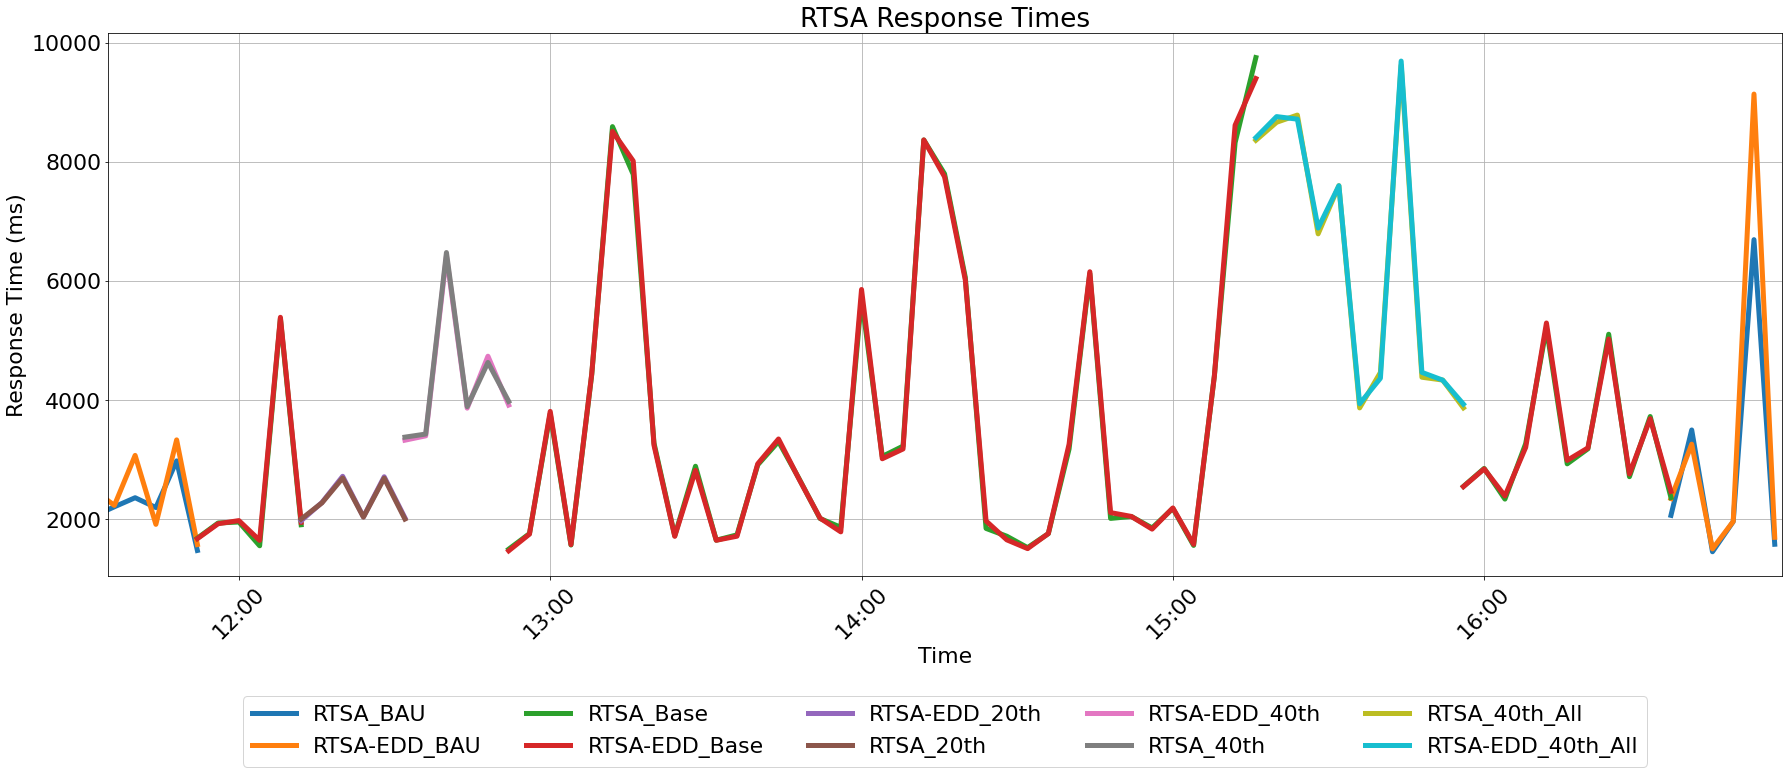

In [233]:
day7_test.time_series_by_categories(['RTSA', 'RTSA-EDD'], [], 'RTSA Response Times')

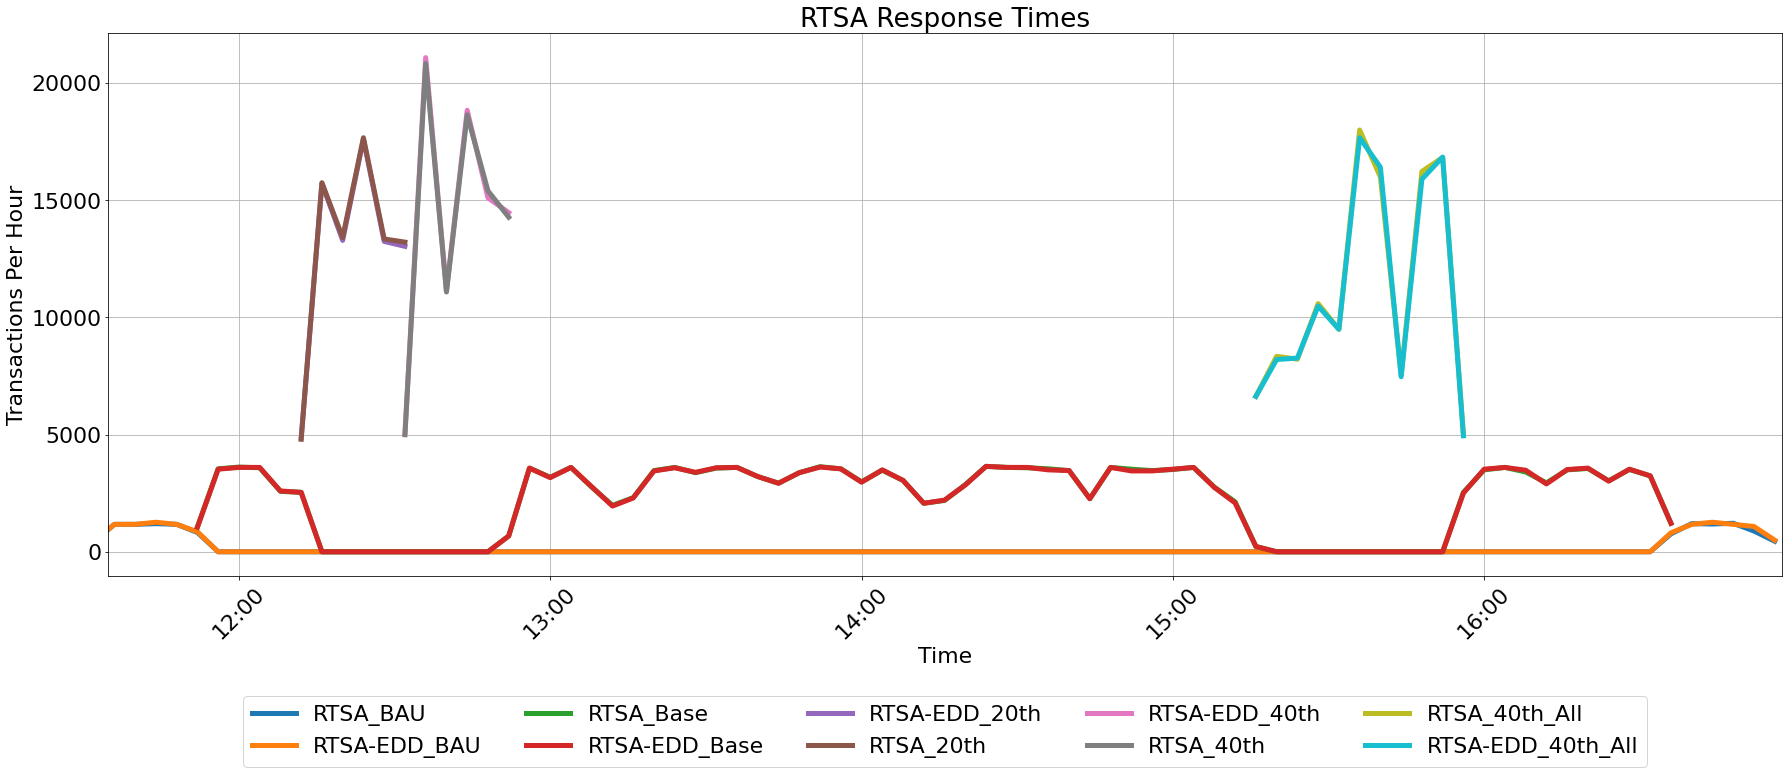

In [234]:
day7_test.time_series_by_categories(['RTSA', 'RTSA-EDD'], [], 'RTSA Response Times', 'txn_per_hr')

In [235]:
day7_ceva = pd.read_csv('logs/day7_ceva.csv', low_memory=False)
day7_ceva = day7_ceva[~day7_ceva['label'].isin(['Audit Table Token Request', 'Inbound Request'])]
day7_ceva.head()


,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
4,1690891342970,216,Delivery Response,202,Accepted,Delivery Response 1-1,NaN,True,NaN,279,5583,1,3,https://oic-dev3-sdhbrjyirc1w-sy.integration.o...,216,0,114
5,1690891342970,228,ASN Receive,202,Accepted,ASN Receive 3-1,NaN,True,NaN,279,5998,1,3,https://oic-dev3-sdhbrjyirc1w-sy.integration.o...,228,0,114
6,1690891342970,236,RMA request,202,Accepted,RMA Request 2-1,NaN,True,NaN,279,5583,1,3,https://oic-dev3-sdhbrjyirc1w-sy.integration.o...,236,0,114
10,1690891402970,236,Delivery Response,202,Accepted,Delivery Response 1-1,NaN,True,NaN,279,5583,1,3,https://oic-dev3-sdhbrjyirc1w-sy.integration.o...,236,0,0
11,1690891402971,349,ASN Receive,202,Accepted,ASN Receive 3-1,NaN,True,NaN,279,5998,1,3,https://oic-dev3-sdhbrjyirc1w-sy.integration.o...,349,0,201


In [236]:
day7_ceva_test = Test(day7_ceva, 240, segmented=False)
day7_ceva_test.unit_tests.get('RMA request')

AttributeError: 'dict_values' object has no attribute 'get'

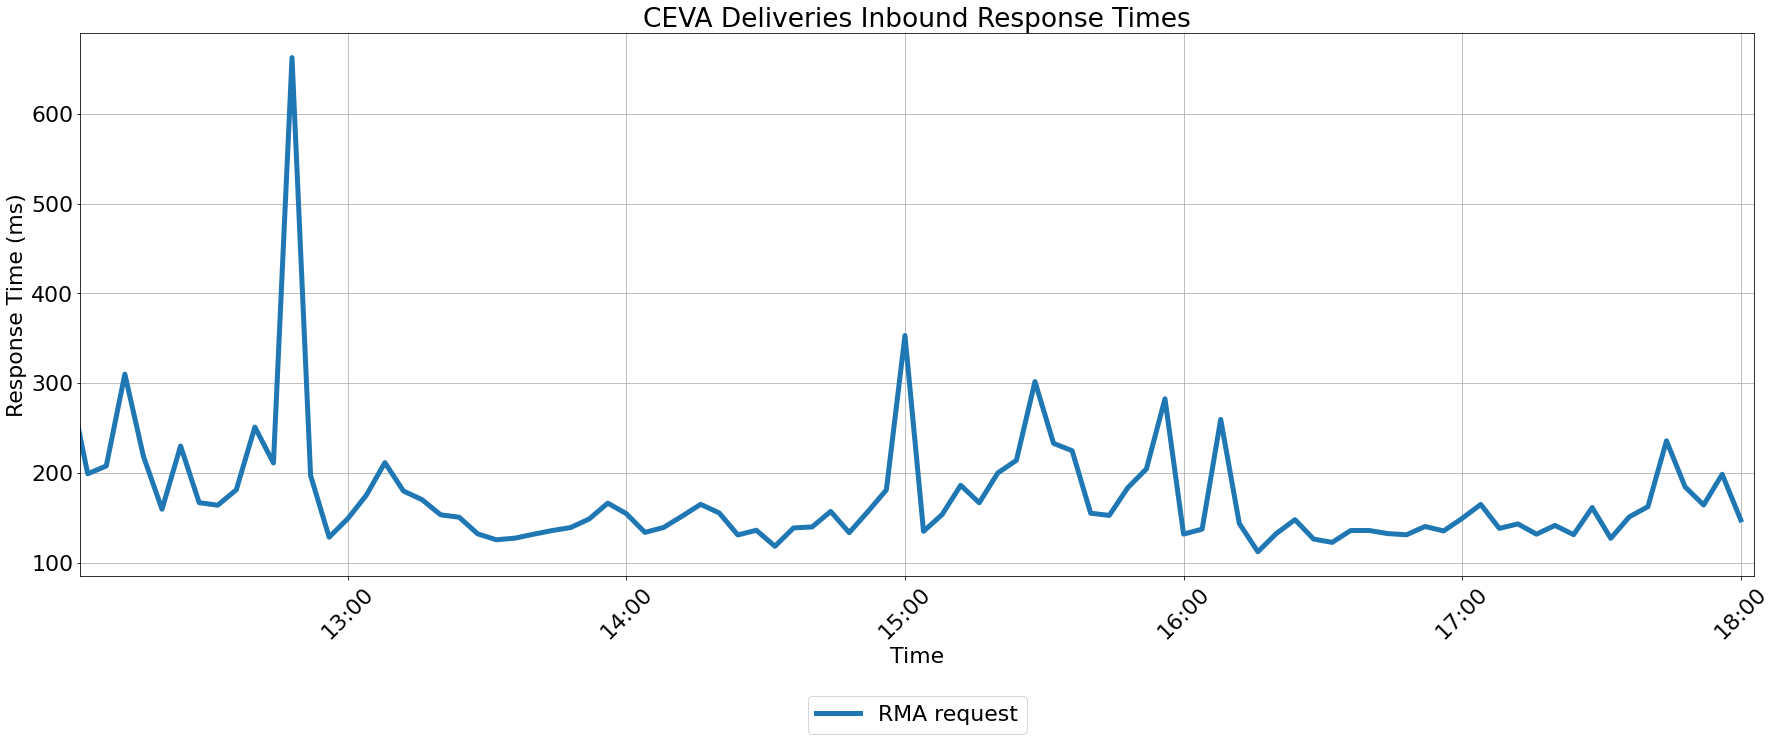

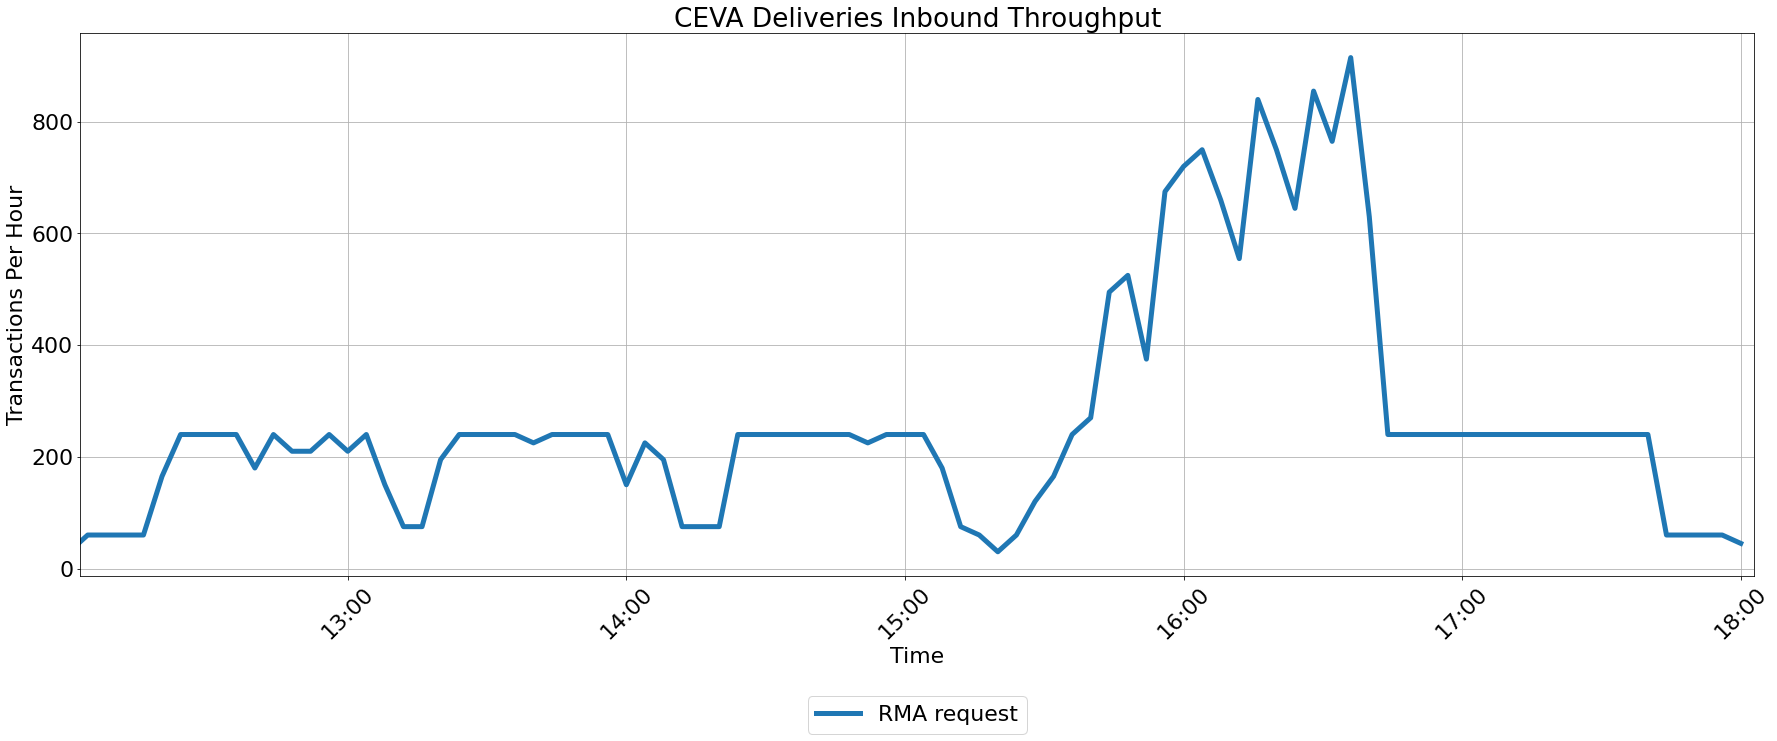

In [315]:
day7_ceva_test.time_series_by_categories(['RMA request'], [], 'CEVA Deliveries Inbound Response Times')
day7_ceva_test.time_series_by_categories(['RMA request'], [], 'CEVA Deliveries Inbound Throughput', 'txn_per_hr')


In [239]:
day7_oic = pd.read_csv('logs/day7_oic.csv', low_memory=False)
day7_oic.head()
integrations = day7_oic['INTERFACE_CODE'].unique()
integrations

array(['TPG-R2-L017.04', 'TPG-R2-L010-SCH', 'TPG-R2-L017_TNT_Shipments',
       'TPG-R2-L017.02', 'TPG-R2-L014A', 'TPG-R2-L008A',
       'TPG-R2-L017.01.SCH', 'TGP-R2-L014', 'TPG-GEN-001',
       'TPG-R2-L002-SCH', 'TPG-R2-L017.01', 'TGP-R2-L014A',
       'TPG-R2-L015A', 'TPG-R2-L002', 'TPG-R2-L007', 'TPG-R2-L008',
       'TPG-R2-L010', 'TPG-R2-L098', 'TPG-R2-L097', 'TPG-R2-L005',
       'TPG-R2-L008-SCH', 'TPG-R2-L050', 'TPG-R2-L017-OrderEvent',
       'TPG-R2-P001_L015', 'TPG-R2-L015', 'TGP-R2-L014-EVT',
       'TPG-R2-L051', 'TPG-R2-L048'], dtype=object)

array(['Token_TnT', 'Token Request', 'TnT_BAU', 'WG_BAU', 'Siebel_BAU',
       'RTSA_BAU', 'RTSA-EDD_BAU', 'QSL_BAU', 'TnT_Base', 'WG_Base',
       'RTSA_Base', 'RTSA-EDD_Base', 'Siebel_Base', 'QSL_Base',
       'RTSA-EDD_20th', 'RTSA_20th', 'RTSA-EDD_40th', 'RTSA_40th',
       'WG_100', 'WG_200', 'Siebel_600', 'Siebel_900', 'TnT_4Th',
       'TnT_7Th', 'TnT_7Th_All', 'WG_200_All', 'RTSA_40th_All',
       'RTSA-EDD_40th_All', 'Siebel_1450_All'], dtype=object)

In [ ]:
day7_test.export_summary_metrics_by_segment('day6_seg_stats.csv')

Segment: 0
Segment: 1
Segment: 2
Segment: 3
Segment: 4
Segment: 5
Segment: 6
Segment: 7
Segment: 8
Segment: 9
Segment: 10
Segment: 11
Segment: 12
Segment: 13
Segment: 14
Segment: 15


In [ ]:
day7_test.results['segment'].unique()

array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
       12., 13., 14., 15.])

In [ ]:
pre_BAU = day7_test.get_segments([0])
post_BAU = day7_test.get_segments([15])
base_loads = day7_test.get_segments([1,10,13,14])
peak_loads = day7_test.get_segments([11,12])

In [ ]:
base_metrics = base_loads.results.groupby("label")["Latency"].agg(
                [
                    "count",
                    "mean",
                    "median",
                    "min",
                    "max",
                    lambda x: x.quantile(0.9),
                    lambda x: x.quantile(0.95),
                    lambda x: x.quantile(0.99),
                ]
            )
base_metrics.rename({'<lambda_0>':"90th",	'<lambda_1>':"95th",	'<lambda_2>':"99th"}, axis=1, inplace=True)
base_metrics

,count,mean,median,min,max,90th,95th,99th
label,,,,,,,,
QSL_Base,40,8426.825000,5282.5,3070,28647,21654.5,26525.65,28395.06
RTSA-EDD_Base,4426,3093.479666,2149.5,1227,17899,6379.5,8718.75,11545.25
RTSA_Base,4426,3076.094216,2132.0,1250,19303,6389.5,8728.00,11544.50
Siebel_Base,365,6498.043836,3929.0,2001,36843,15359.2,22793.00,31520.92
TnT_Base,268,619.932836,220.0,103,6021,1828.9,2589.60,3451.47
Token Request,4,254.500000,254.0,242,268,265.6,266.80,267.76
WG_Base,28,4272.214286,2734.5,1467,20700,8695.5,10273.85,18069.12


In [ ]:
total_seconds = (max(peak_loads.results['timeStamp']) - min(peak_loads.results['timeStamp']))/1000

peak_load_metrics = peak_loads.results.groupby("label")["Latency"].agg(
                [
                    "count",
                    "mean",
                    "median",
                    "min",
                    "max",
                    lambda x: x.quantile(0.9),
                    lambda x: x.quantile(0.95),
                    lambda x: x.quantile(0.99),
                    lambda x: np.round((x.shape[0] / total_seconds)*3600,2),
                ]
            )
peak_load_metrics.rename({'<lambda_0>':"90th",	'<lambda_1>':"95th",	'<lambda_2>':"99th", '<lambda_3>':"Txns/hr"}, axis=1, inplace=True)
peak_load_metrics

,count,mean,median,min,max,90th,95th,99th,Txns/hr
label,,,,,,,,,
QSL_Base,20,19823.650000,20615.0,7122,62067,26412.6,28773.3,55408.26,29.81
RTSA-EDD_40th_All,8155,5895.832373,5058.0,1753,31538,9050.6,10218.9,24642.78,12154.89
RTSA_40th_All,8191,5868.637041,5038.0,1670,30819,9059.0,10211.5,24758.20,12208.54
Siebel_1450_All,527,16870.614801,13280.0,4004,52507,30122.8,31189.0,47583.96,785.48
TnT_7Th_All,42924,390.972766,125.0,91,6741,1135.0,1348.0,2569.00,63977.48
Token Request,2,260.000000,260.0,247,273,270.4,271.7,272.74,2.98
WG_200_All,130,6421.469231,4670.5,2187,45383,8995.1,16785.5,32552.12,193.76


In [ ]:
total_seconds = (max(pre_BAU.results['timeStamp']) - min(pre_BAU.results['timeStamp']))/1000
print(total_seconds)
pre_BAU_metrics=pre_BAU.results.groupby("label")["Latency"].agg(
                [
                    "count",
                    "mean",
                    "median",
                    "min",
                    "max",
                    lambda x: x.quantile(0.9),
                    lambda x: x.quantile(0.95),
                    lambda x: x.quantile(0.99),
                    lambda x: np.round((x.shape[0] / total_seconds)*3600,2),
                ]
            )
pre_BAU_metrics.rename({'<lambda_0>':"90th",	'<lambda_1>':"95th",	'<lambda_2>':"99th", '<lambda_3>':"Txns/hr"}, axis=1, inplace=True)
pre_BAU_metrics

1199.414


,count,mean,median,min,max,90th,95th,99th,Txns/hr
label,,,,,,,,,
QSL_BAU,7,7973.714286,6016.0,3214,26301,14728.8,20514.90,25143.78,21.01
RTSA-EDD_BAU,405,2468.817284,1470.0,1253,14610,4858.4,8460.20,14205.24,1215.59
RTSA_BAU,396,2277.838384,1445.5,1233,19999,4719.5,7100.25,13509.60,1188.58
Siebel_BAU,34,3668.941176,2305.0,2031,23818,4479.3,9823.50,22144.90,102.05
TnT_BAU,50,219.280000,120.5,103,1946,237.1,404.55,1764.70,150.07
Token Request,1,300.000000,300.0,300,300,300.0,300.00,300.00,3.00
WG_BAU,7,5947.857143,3421.0,1572,24205,12862.0,18533.50,23070.70,21.01


In [ ]:
total_seconds = (max(post_BAU.results['timeStamp']) - min(post_BAU.results['timeStamp']))/1000
print(total_seconds)
post_BAU_metrics =post_BAU.results.groupby("label")["Latency"].agg(
                [
                    "count",
                    "mean",
                    "median",
                    "min",
                    "max",
                    lambda x: x.quantile(0.9),
                    lambda x: x.quantile(0.95),
                    lambda x: x.quantile(0.99),
                    lambda x: np.round((x.shape[0] / total_seconds)*3600,2),
                ]
            )
post_BAU_metrics.rename({'<lambda_0>':"90th",	'<lambda_1>':"95th",	'<lambda_2>':"99th", '<lambda_3>':"Txns/hr"}, axis=1, inplace=True)
post_BAU_metrics

1199.562


,count,mean,median,min,max,90th,95th,99th,Txns/hr
label,,,,,,,,,
QSL_BAU,7,11507.142857,6123.0,3148,30024,26445.6,28234.80,29666.16,21.01
RTSA-EDD_BAU,399,3445.809524,1789.0,1256,27228,5340.2,16526.30,26752.36,1197.44
RTSA_BAU,380,2899.902632,1637.0,1251,26799,4019.2,8806.15,23171.89,1140.42
Siebel_BAU,34,5580.970588,3379.0,2087,28665,9625.2,23617.80,28313.88,102.04
TnT_BAU,50,258.500000,127.5,107,2720,292.0,857.40,1959.52,150.05
Token Request,1,263.000000,263.0,263,263,263.0,263.00,263.00,3.00
WG_BAU,7,6142.285714,2814.0,1528,27222,13853.4,20537.70,25885.14,21.01


AttributeError: 'Test' object has no attribute 'result'

In [310]:
def segment_metrics(df):
    total_seconds = (max(df.results['timeStamp']) - min(df.results['timeStamp']))/1000

    out =  df.results.groupby("label")["Latency"].agg(
                [
                    "count",
                    "mean",
                    "median",
                    "min",
                    "max",
                    lambda x: x.quantile(0.9),
                    lambda x: x.quantile(0.95),
                    lambda x: x.quantile(0.99),
                    lambda x: np.round((x.shape[0] / total_seconds)*3600,2)
                ]
            )
    return out.rename({'<lambda_0>':"90th",	'<lambda_1>':"95th",	'<lambda_2>':"99th", '<lambda_3>':"Txns/hr"}, axis=1)

def compare_segemnts(seg1, seg2): 
    seg1_df = segment_metrics(day7_test.get_segments(seg1))
    seg2_df = segment_metrics(day7_test.get_segments(seg2))
    seg1_df.reset_index(inplace=True)
    seg2_df.reset_index(inplace=True)
    c1 = seg1_df[['mean', 'median', '90th','Txns/hr']]
    c2 = seg2_df[['mean', 'median', '90th','Txns/hr']]
    ab_diff = c2 - c1
    percentage = np.round((ab_diff / c1),4)
    percentage.set_index(seg1_df['label'], inplace=True)
    return percentage
    

In [314]:
# pre_BAU = day7_test.get_segments([0])
# post_BAU = day7_test.get_segments([15])
# base_loads = day7_test.get_segments([1,10,13,14])
# peak_loads = day7_test.get_segments([11,12])

compare_segemnts([5], [11,12])

,mean,median,90th,Txns/hr
label,,,,
QSL_Base,0.9403,2.5497,0.1220,-0.0053
RTSA-EDD_Base,0.8110,1.9544,0.1873,2.7802
RTSA_Base,0.8023,1.9088,0.1876,2.7898
Siebel_Base,1.3824,3.8680,0.3318,2.0479
TnT_Base,-0.5066,-0.3523,-0.5288,317.6606
Token Request,-0.1003,-0.1003,-0.0644,-0.0067
WG_200,1.0218,0.8490,0.9261,-0.0349


In [ ]:
segment_metrics(day7_test.get_segments([1,16]))

,count,mean,median,min,max,90th,95th,99th,Txns/hr
label,,,,,,,,,
QSL_Base,10,5826.300000,3585,3070,26448,6311.4,16379.7,24434.34,29.97
RTSA-EDD_Base,1127,2398.441881,1529,1255,17899,5754.6,7635.9,11397.08,3378.01
RTSA_Base,1127,2365.371783,1498,1250,15800,5181.8,7708.6,11447.50,3378.01
Siebel_Base,93,4501.000000,2274,2001,30627,8647.4,20462.2,28152.20,278.75
TnT_Base,67,455.582090,119,103,3432,1578.2,2243.9,3322.44,200.82
Token Request,1,242.000000,242,242,242,242.0,242.0,242.00,3.00
WG_Base,7,2217.714286,1799,1467,4398,3289.2,3843.6,4287.12,20.98


In [ ]:
moderate = day6_test.get_segments([2,3,4,5,6,7,8,9,10,11,15,16])

In [ ]:
moderate.results.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,Segment,segment
1815,1690807551812,227,Token Request,200,OK,Tokens 1-1,text,True,NaN,3002,507,1,1,https://idcs-067d961402b24114844819b5e21e493d....,227,0,101,-1,2.0
1816,1690807552103,219,TnT_Base,200,OK,TnT 4-1,text,True,NaN,2285,370,1,7,https://g69ed1b64d97007-y9u8zl3pgaf6gcv6.adb.a...,219,0,68,-1,2.0
1817,1690807553401,1519,RTSA-EDD_Base,200,OK,RTSA_EDD 2-1,text,True,NaN,915,3124,5,14,https://oic-dev3-sdhbrjyirc1w-sy.integration.o...,1518,0,60,-1,2.0
1818,1690807553567,1693,RTSA_Base,200,OK,RTSA 1-1,text,True,NaN,915,3118,5,14,https://oic-dev3-sdhbrjyirc1w-sy.integration.o...,1693,0,68,-1,2.0
1819,1690807553620,1707,WG_Base,202,Accepted,WG 6-1,text,True,NaN,388,3788,1,14,https://oic-dev3-sdhbrjyirc1w-sy.integration.o...,1707,0,61,-1,2.0


In [241]:
codes = ['TPG-R2-L017.04', 'TPG-R2-L010-SCH',
       'TPG-R2-L017.02', 'TPG-R2-L014A', 'TPG-R2-L008A',
       'TPG-R2-L017.01.SCH', 'TGP-R2-L014',
       'TPG-R2-L002-SCH', 'TPG-R2-L017.01', 'TGP-R2-L014A',
       'TPG-R2-L015A', 'TPG-R2-L002', 'TPG-R2-L008',
       'TPG-R2-L010', 'TPG-R2-L098', 'TPG-R2-L097', 'TPG-R2-L005',
       'TPG-R2-L008-SCH', 'TPG-R2-L050', 'TPG-R2-L017-OrderEvent',
       'TPG-R2-P001_L015', 'TPG-R2-L015', 'TGP-R2-L014-EVT' ]


ints = {}

# Split the DataFrame based on unique interface_code values
for interface_code, df_group in day7_oic.groupby('INTERFACE_CODE'):
       if interface_code in codes:
              ints[interface_code] = df_group.copy()

# Access individual DataFrames in the dictionary
for interface_code, df in ints.items():
    print('Interface Code:', interface_code)
    #print(df)


Interface Code: TGP-R2-L014
Interface Code: TGP-R2-L014-EVT
Interface Code: TGP-R2-L014A
Interface Code: TPG-R2-L002
Interface Code: TPG-R2-L002-SCH
Interface Code: TPG-R2-L005
Interface Code: TPG-R2-L008
Interface Code: TPG-R2-L008-SCH
Interface Code: TPG-R2-L008A
Interface Code: TPG-R2-L010
Interface Code: TPG-R2-L010-SCH
Interface Code: TPG-R2-L014A
Interface Code: TPG-R2-L015
Interface Code: TPG-R2-L015A
Interface Code: TPG-R2-L017-OrderEvent
Interface Code: TPG-R2-L017.01
Interface Code: TPG-R2-L017.01.SCH
Interface Code: TPG-R2-L017.02
Interface Code: TPG-R2-L017.04
Interface Code: TPG-R2-L050
Interface Code: TPG-R2-L097
Interface Code: TPG-R2-L098
Interface Code: TPG-R2-P001_L015


In [269]:
time_lim =(pd.to_datetime(day7_oic['End'][0]), pd.to_datetime(day7_oic['End'][day7_oic.shape[0]-1]))

In [ ]:
time_lim

(Timestamp('2023-08-01 21:00:01'), Timestamp('2023-08-02 02:35:58'))

In [ ]:
ints.get('TPG-R2-L008-SCH').head()

,INTERFACE_CODE,INTERFACE_RUN_ID,Start,End,Elapsed_seconds
876,TPG-R2-L008-SCH,5813367,21:43:08,01/AUG/23 09:44:33.000000000 PM,85
1447,TPG-R2-L008-SCH,5623896,21:53:09,01/AUG/23 09:53:31.000000000 PM,22
2706,TPG-R2-L008-SCH,5624665,22:03:01,01/AUG/23 10:03:52.000000000 PM,51
4085,TPG-R2-L008-SCH,5817485,22:13:03,01/AUG/23 10:13:55.000000000 PM,52
8617,TPG-R2-L008-SCH,5819700,22:23:07,01/AUG/23 10:24:15.000000000 PM,68


In [249]:
def scheduled_int_time_series(df, title):
    plt.rcParams.update({"font.size": 22})
    time = pd.to_datetime(df['End'])
    #print(time)
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(time, df['Elapsed_seconds'], label='Runtime', lw=3, marker='o', markersize=10)
    ax.set_xlabel('Time')
    ax.set_ylabel('RunTime (sec)')
    ax.set_title(title)
    ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M')) 
    ax.legend(
            loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=2
        )
    plt.grid()
    # Rotate and align the x-axis tick labels for better visibility
    plt.xticks(rotation=45, ha='right')
    plt.show()

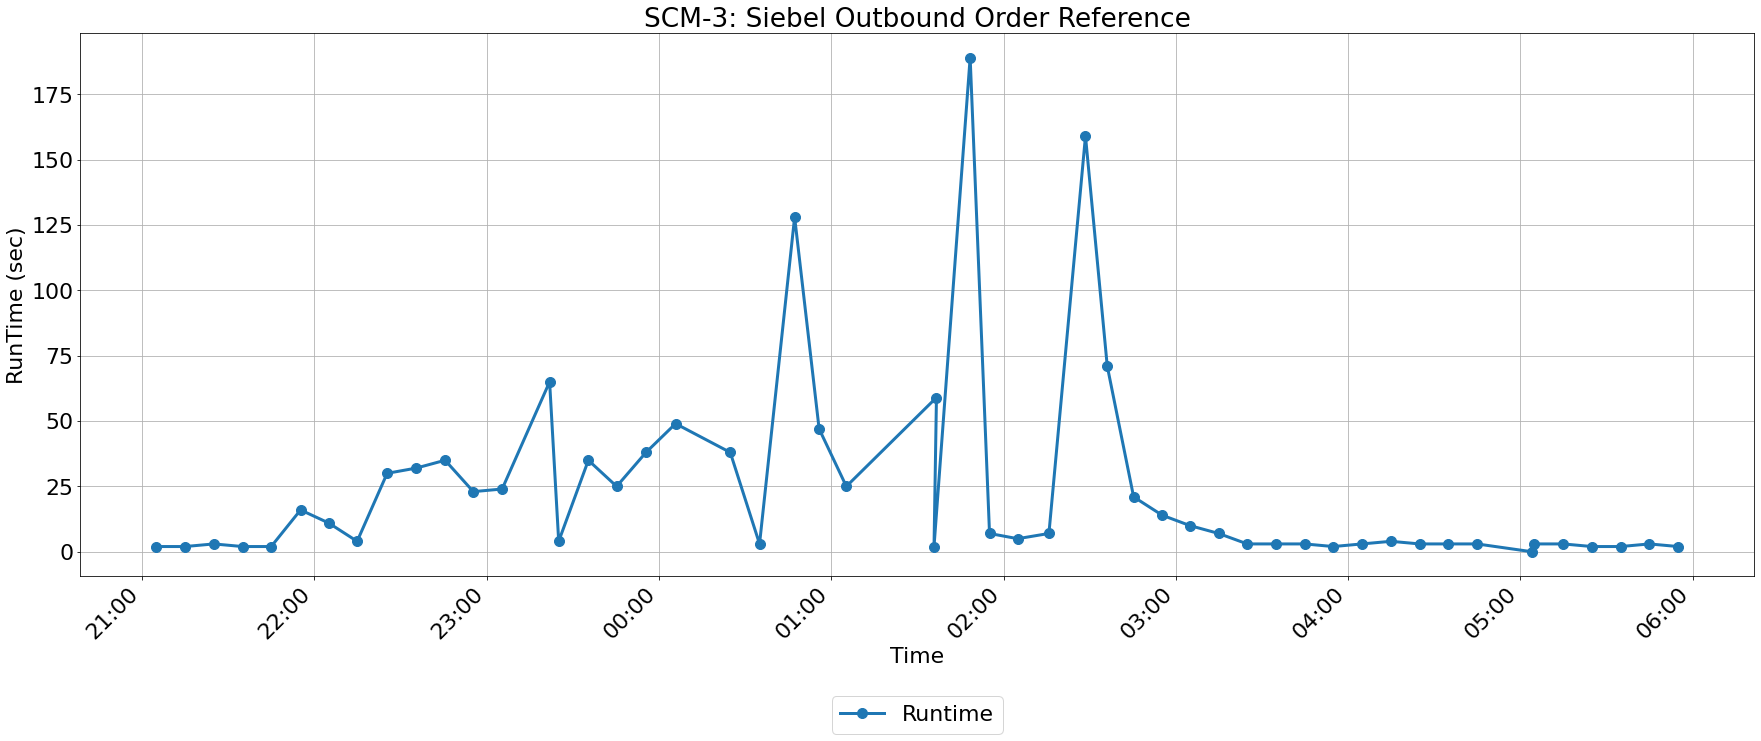

In [ ]:
scheduled_int_time_series(ints.get('TPG-R2-L008A'), 'SCM-3: Siebel Outbound Order Reference')

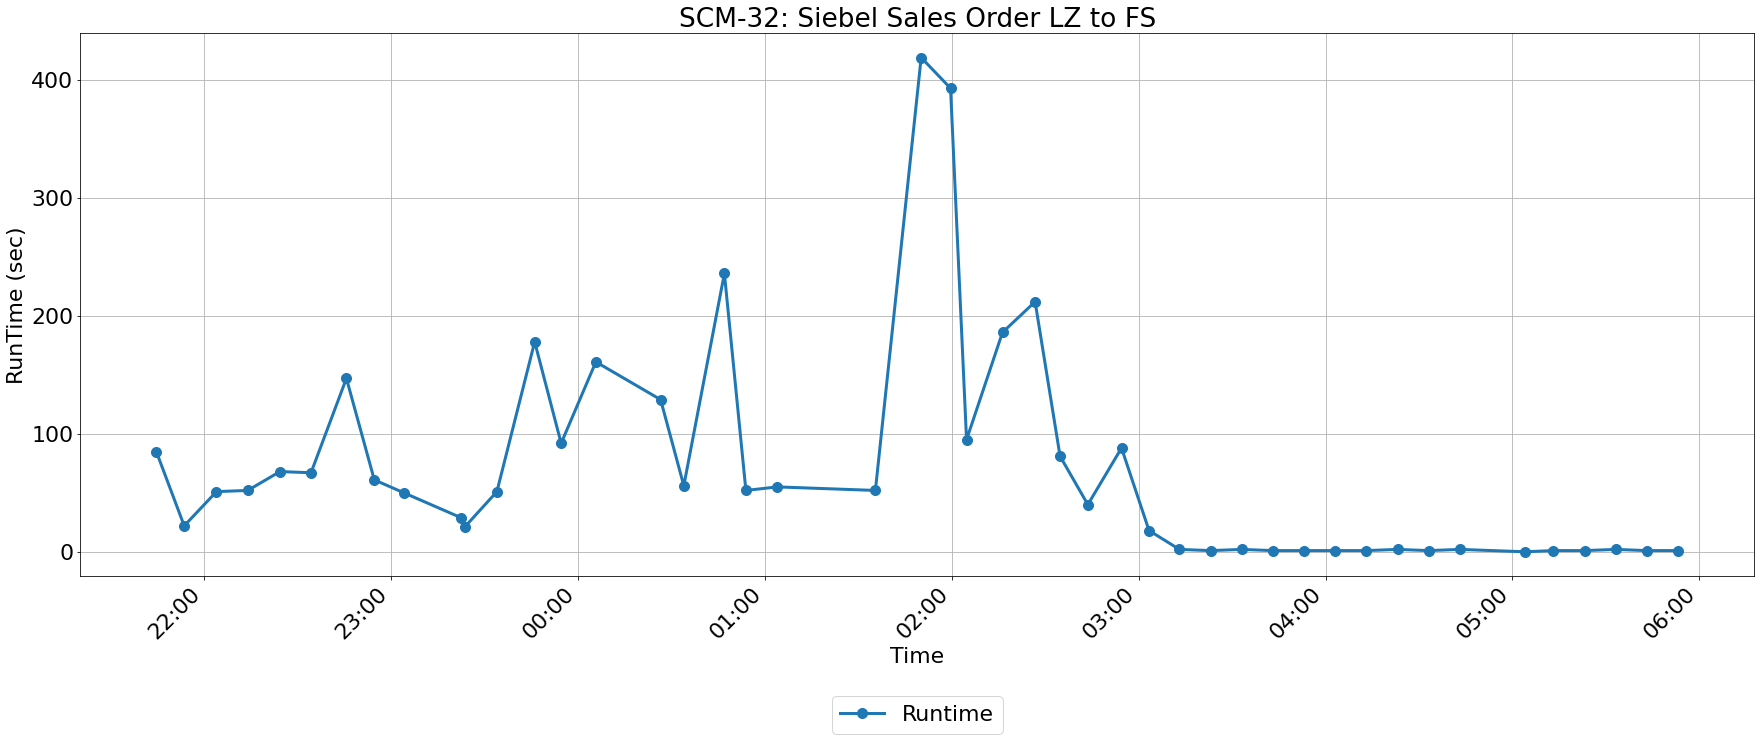

In [ ]:
scheduled_int_time_series(ints.get('TPG-R2-L008-SCH'), 'SCM-32: Siebel Sales Order LZ to FS')

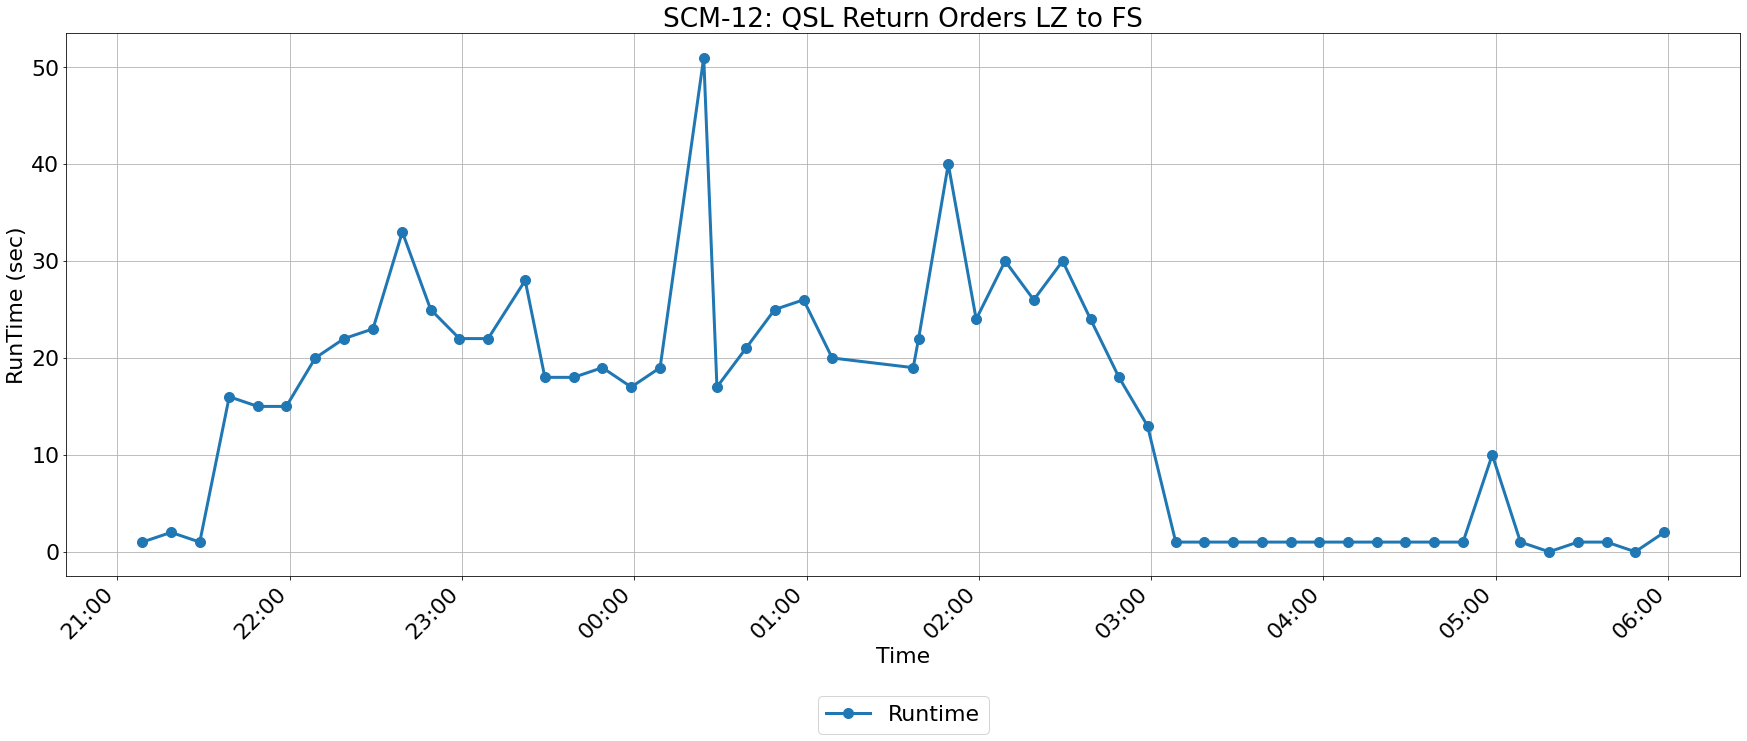

In [ ]:
scheduled_int_time_series(ints.get('TPG-R2-L002-SCH'), 'SCM-12: QSL Return Orders LZ to FS')

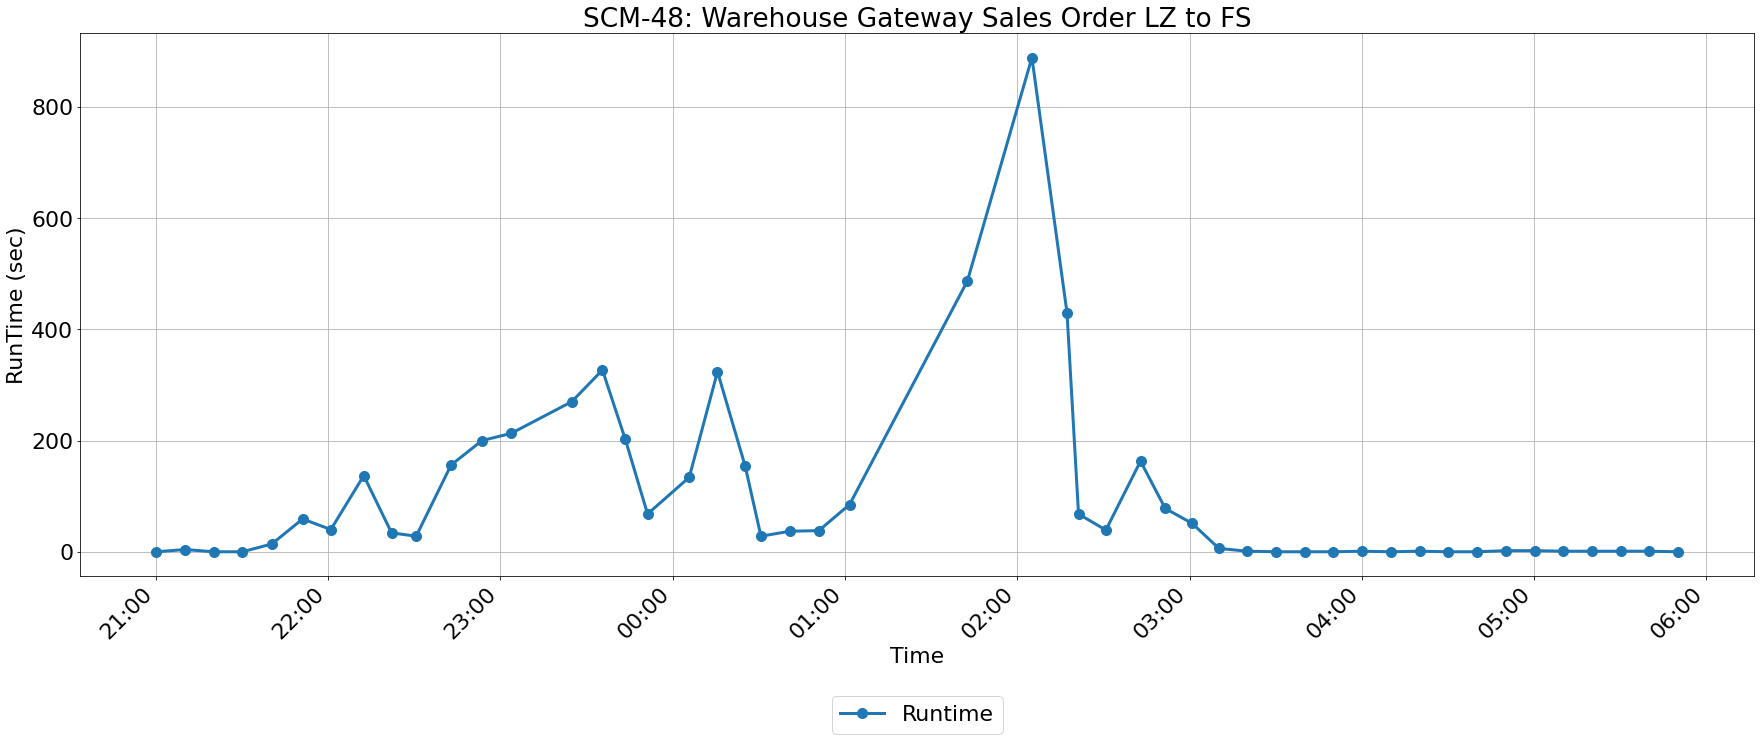

In [ ]:
scheduled_int_time_series(ints.get('TPG-R2-L010-SCH'), 'SCM-48: Warehouse Gateway Sales Order LZ to FS')

In [ ]:
tnt_unit = pd.read_csv('logs/tnt_unit_testing.csv', low_memory=False)
tnt_unit.head()

,INTERFACE_CODE,INTERFACE_RUN_ID,Start,End,Elapsed_seconds
0,TPG-R2-L017.02,5174530,10:57:28,01/AUG/23 10:57:28.000000000 AM,0
1,TPG-R2-L017.01.SCH,4936690,10:58:07,01/AUG/23 12:26:20.000000000 PM,5293
2,TPG-R2-L017.01,5388624,11:02:53,01/AUG/23 11:07:27.000000000 AM,274
3,TPG-R2-L017.01,5584224,11:02:53,01/AUG/23 11:13:26.000000000 AM,633
4,TPG-R2-L017.01,5584221,11:02:53,01/AUG/23 11:13:14.000000000 AM,621


In [ ]:
def resample_and_calculate_average(df):
    df['Time'] = pd.to_datetime(df['End'])
    new = df.set_index("Time")
    resampled = new.groupby("INTERFACE_CODE").resample('10min').agg({'Elapsed_seconds': 'mean', 'INTERFACE_RUN_ID': 'count'})
    resampled.rename(columns={'Elapsed_seconds': 'Average_Elapsed_seconds', 'INTERFACE_RUN_ID': 'Row_Count'}, inplace=True)
    resampled.reset_index(level='INTERFACE_CODE', inplace=True)

    return resampled
    

In [ ]:
resample_and_calculate_average(tnt_unit).head(10)

,INTERFACE_CODE,Average_Elapsed_seconds,Row_Count
Time,,,
2023-08-01 12:00:00,TPG-R2-L017-OrderEvent,7.666667,6
2023-08-01 11:00:00,TPG-R2-L017.01,120.268071,1757
2023-08-01 12:00:00,TPG-R2-L017.01,77.336516,1676
2023-08-01 13:00:00,TPG-R2-L017.01,57.688312,154
2023-08-01 14:00:00,TPG-R2-L017.01,40.275362,69
2023-08-01 15:00:00,TPG-R2-L017.01,39.787879,66
2023-08-01 12:00:00,TPG-R2-L017.01.SCH,5293.000000,1
2023-08-01 13:00:00,TPG-R2-L017.01.SCH,399.000000,1
2023-08-01 14:00:00,TPG-R2-L017.01.SCH,305.000000,1


In [271]:
def plot_app_int_time_series(df, title):
    new = df.reset_index()
    time = pd.to_datetime(new['Time'])
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(time, new['Row_Count'], label='Count', lw=3, marker='o', markersize=10)
    ax.set_xlabel('Time')
    ax.set_ylabel('Count')
    ax.set_title(title)
    ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M')) 
    ax.legend(
            loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=2
        )
    plt.grid()
    # Rotate and align the x-axis tick labels for better visibility
    plt.xticks(rotation=45, ha='right')
    plt.xlim(time_lim)
    plt.show()


In [263]:


Email = resample_and_calculate_average(ints.get('TPG-R2-L017.01'))
create_activity  = resample_and_calculate_average(ints.get('TPG-R2-L017.04'))
order_event = resample_and_calculate_average(ints.get('TPG-R2-L017-OrderEvent'))
create_activity.head()
#plot_app_int_time_series(df[df["INTERFACE_CODE"]=='TPG-R2-L017.04'], 'TPG-R2-L017.04')

,INTERFACE_CODE,Average_Elapsed_seconds,Row_Count
Time,,,
2023-08-01 21:00:00,TPG-R2-L017.04,0.965517,87
2023-08-01 21:10:00,TPG-R2-L017.04,0.592857,140
2023-08-01 21:20:00,TPG-R2-L017.04,0.804878,82
2023-08-01 21:30:00,TPG-R2-L017.04,1.634146,82
2023-08-01 21:40:00,TPG-R2-L017.04,1.012195,82


In [277]:
order_event['Row_Count'].sum()

2400

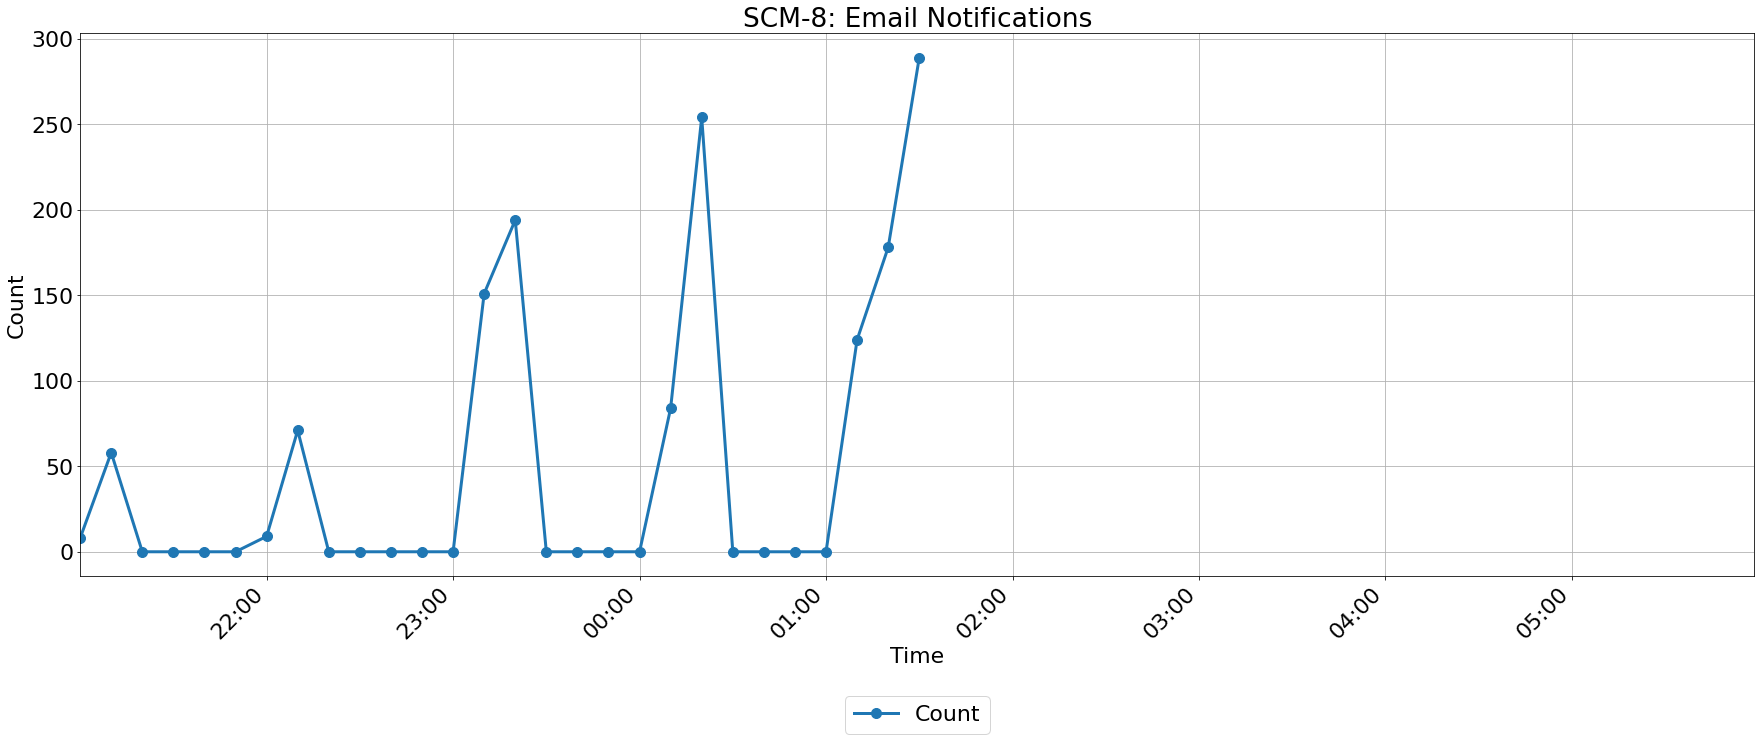

In [272]:
plot_app_int_time_series(Email, 'SCM-8: Email Notifications')

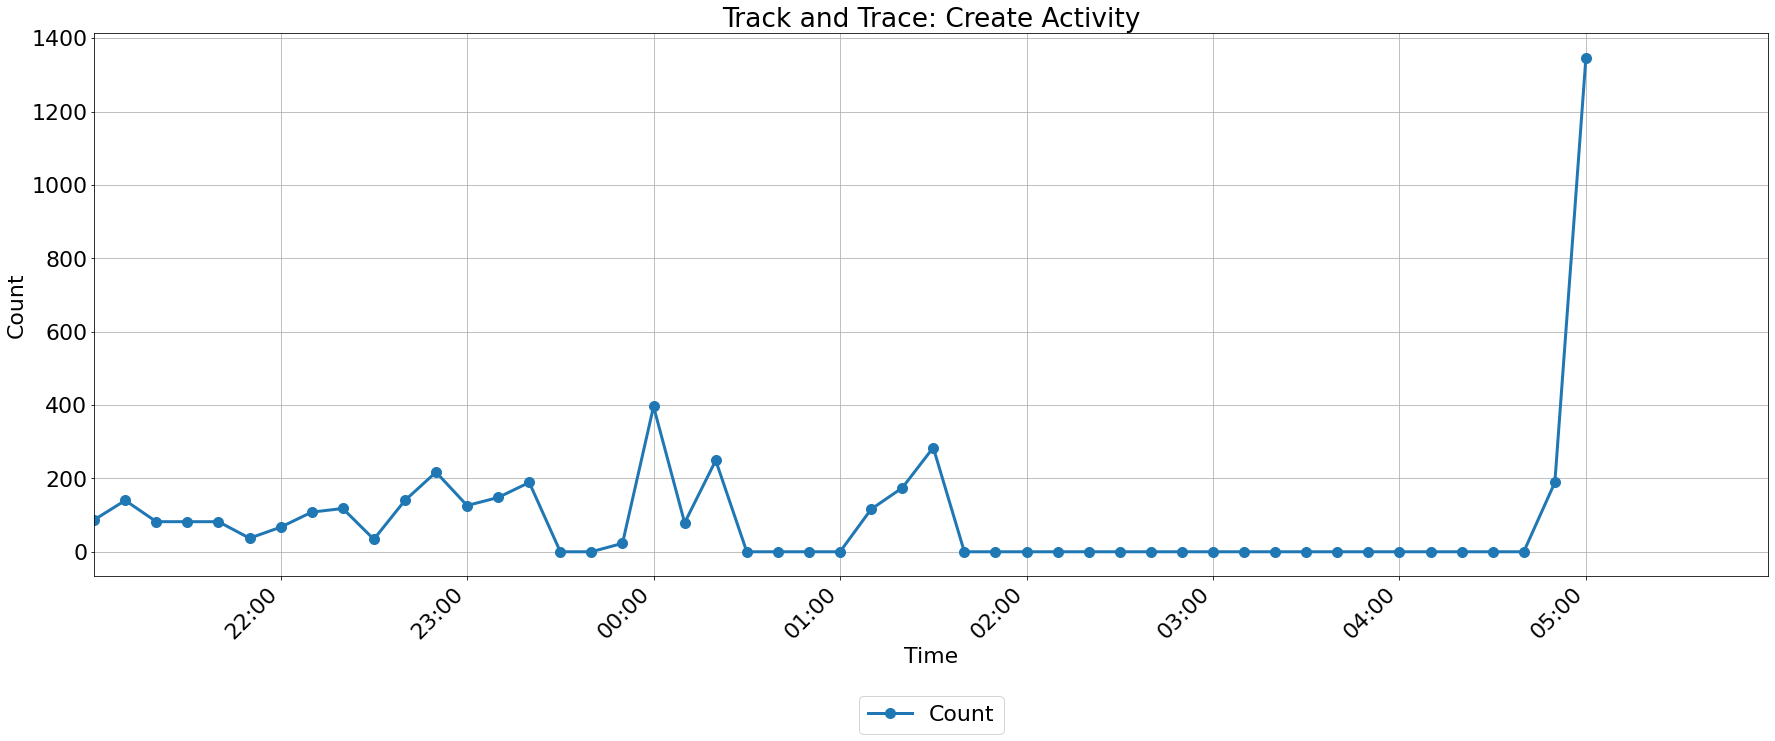

In [273]:
plot_app_int_time_series(create_activity, 'Track and Trace: Create Activity')

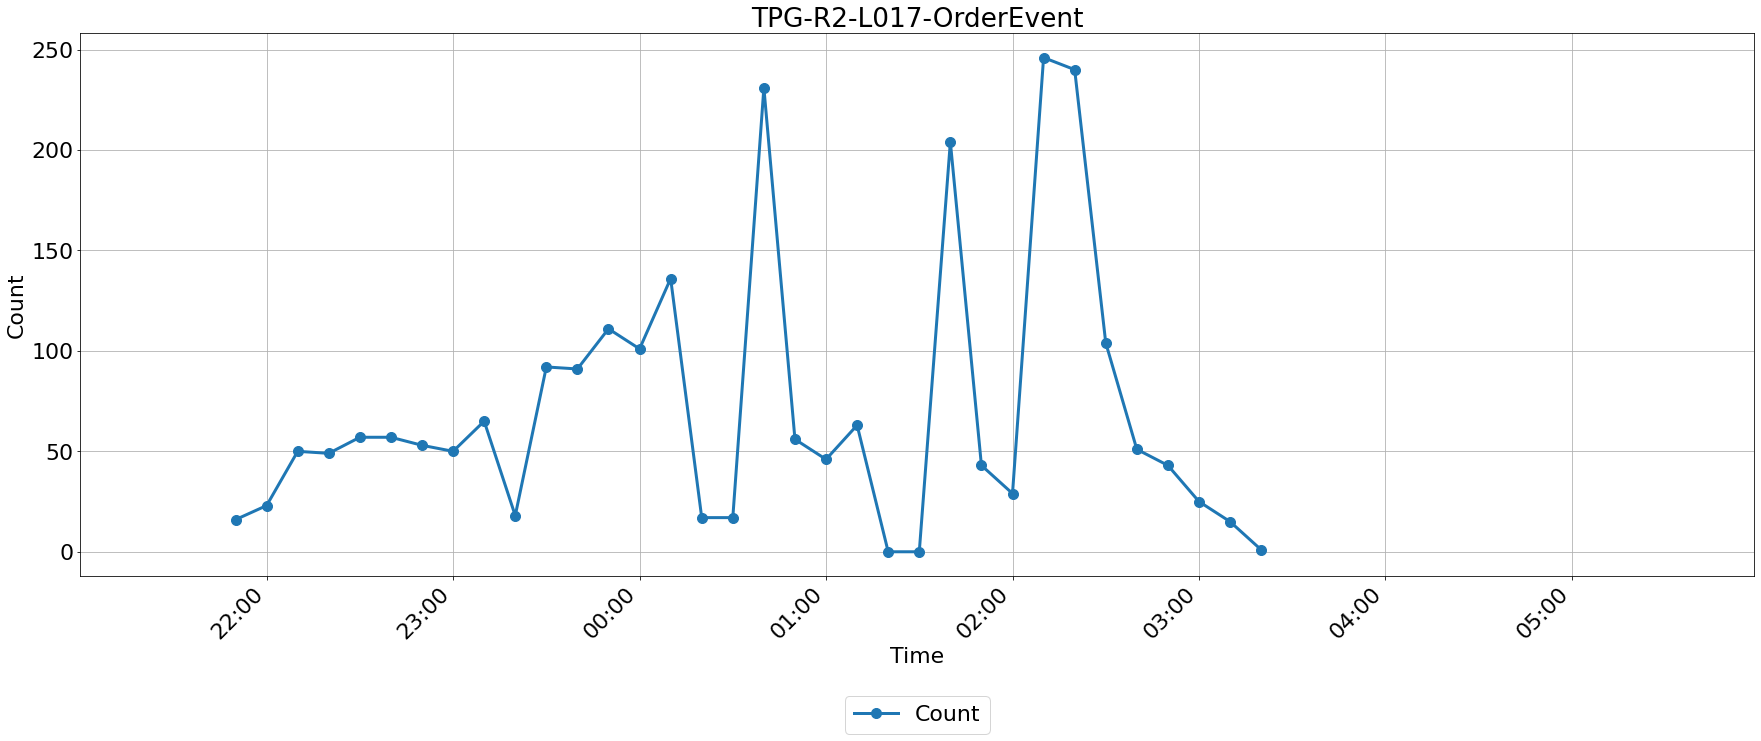

In [274]:
plot_app_int_time_series(order_event, 'TPG-R2-L017-OrderEvent')

In [275]:
df[df["INTERFACE_CODE"]=='TPG-R2-L017.04']['Row_Count'].sum()

KeyError: 'Row_Count'

In [61]:
df["INTERFACE_CODE"].unique()

array(['TPG-R2-L017-OrderEvent', 'TPG-R2-L017.01', 'TPG-R2-L017.01.SCH',
       'TPG-R2-L017.02', 'TPG-R2-L017.04'], dtype=object)